<a href="https://colab.research.google.com/github/sarik-k/CIS6110_T3_A2_Neural_Network/blob/main/Copy_of_cis6110_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIS6110 Sentiment Analysis Using Neural Networks
- Assessment 2 - Practical
- Trimester 3, 2024
- Course Examiner: KC Chan

## Overview

This assignment will introduce you to the concepts of sentiment analysis using machine learning and deep learning techniques. The assignment is divided into three parts:

1. **Traditional Machine Learning with Neural Networks and Feature Engineering (Ungraded)**
    - Objective: Build a simple neural network for sentiment analysis using traditional feature engineering techniques.
    - Steps:
        1. Data Loading and Preparation:
            - Load the IMDB reviews dataset.
            - Preprocess the text data (tokenization, removing stop words, converting text to numerical features using TF-IDF).
        2. Model Building:
            - Construct a simple neural network using TensorFlow/Keras.
        3. Training the Model:
            - Train the model on the preprocessed data.
            - Plot and analyse the training and validation accuracy/loss.
        4. Evaluating the Model:
            - Evaluate the model on the test set.
            - Generate and analyse the classification report.
        5. Questions and Analysis:
            - Discuss the model’s performance and training process.
            - Suggest improvements and modifications to the network structure.

2. **Deep Learning with LSTM Networks (Graded)**
    - Objective: Build an LSTM model for sentiment analysis.
    - Steps:
        1. Data Loading and Preparation:
            - Load the IMDB reviews dataset.
            - Preprocess the text data (tokenization, padding sequences).
        2. Model Building:
            - Construct an LSTM model using TensorFlow/Keras.
        3. Training the Model:
            - Train the model on the preprocessed data.
            - Plot and analyse the training and validation accuracy/loss.
        4. Evaluating the Model:
            - Evaluate the model on the test set.
            - Generate and analyse the classification report.
        5. Questions and Analysis:
            - Discuss the model’s performance and training process.
            - Suggest improvements and modifications to the network structure.

3. **Deep Learning with Transformer-based Models - BERT (Bonus)**
    - Objective: Use a pre-trained BERT model for sentiment analysis.
    - Steps:
        1. Data Loading and Preparation:
            - Load the IMDB reviews dataset.
            - Preprocess the text data (tokenization using BERT tokenizer, padding sequences).
        2. Model Building:
            - Use a pre-trained BERT model and fine-tune it for sentiment analysis.
        3. Training the Model:
            - Train the model on the preprocessed data.
            - Plot and analyse the training and validation accuracy/loss.
        4. Evaluating the Model:
            - Evaluate the model on the test set.
            - Generate and analyse the classification report.
        5. Questions and Analysis:
            - Discuss the model’s performance and training process.
            - Suggest improvements and modifications to the network structure.

**Submission:** Once you have completed all the parts and answered the questions, share the Colab URL for marking.


# Machine Learning with Neural Networks and Feature Engineering (For Practice, Ungraded)

- Objective: Build a simple neural network for sentiment analysis using traditional feature engineering techniques.
- Activities in this Section is for practice and will not be graded.


## Step 1: Data Loading and Preparation:
  - Load the IMDB reviews dataset.
  - Preprocess the text data (tokenization, removing stop words, converting text to numerical features using TF-IDF).

In [ ]:
# This code: Load the IMDB reviews dataset

# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import imdb

# Load the IMDB dataset
# We use only the top 10,000 most frequent words to keep the dataset manageable
num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

# Print the shape of data
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (25000,)
Test data shape: (25000,)


**Understanding the Dataset** Self-Directed Learning

Ask the [Sentiment Analysis Tutor GPT](https://chatgpt.com/g/g-xP5xBzqnx-sentiment-analysis-tutor) the following questions to understand a few concepts:

1. Data Loading and Splitting
  - What is the IMDB dataset, and how is it structured?
  - How are the training and test sets predefined in the IMDB dataset?
  - Why is it important to have separate training and test sets?

2. Vocabulary and Tokenization
  - What does the num_words parameter represent, and how does it affect the dataset?
  - How are reviews converted from text to sequences of word indices?
  - What is the role of the get_word_index() function?

In [ ]:
# This code: Preprocess the text data: Convert word indices back to text and then apply TF-IDF to transform the text into numerical features.

# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Function to decode the reviews back to text
word_index = imdb.get_word_index()
index_word = {v + 3: k for k, v in word_index.items()}
index_word[0] = '<PAD>'
index_word[1] = '<START>'
index_word[2] = '<UNK>'
index_word[3] = '<UNUSED>'

def decode_review(encoded_review):
    return ' '.join([index_word.get(i, '?') for i in encoded_review])

# Decode the reviews
X_train_text = [decode_review(review) for review in X_train]
X_test_text = [decode_review(review) for review in X_test]

# Use TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=num_words, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train_text).toarray()
X_test_tfidf = vectorizer.transform(X_test_text).toarray()

# Print the shape of TF-IDF features
print("TF-IDF training data shape:", X_train_tfidf.shape)
print("TF-IDF test data shape:", X_test_tfidf.shape)


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
TF-IDF training data shape: (25000, 9478)
TF-IDF test data shape: (25000, 9478)


**Data Preprocessing** Self-Directed Learning

Explore the following questions to deepen your understanding of the concepts. You may ask the [Sentiment Analysis Tutor GPT](https://chatgpt.com/g/g-xP5xBzqnx-sentiment-analysis-tutor) for information.

1. Text to Numerical Features
  - What is tokenization, and why is it necessary?
  - What is the purpose of using TF-IDF Vectorizer in text preprocessing?
  - How does the TF-IDF Vectorizer transform text data into numerical features?

2. Stop Words and Feature Limiting
  - What are stop words, and why are they removed?
  - How does limiting the vocabulary size (e.g., using num_words=10000) help in managing computational resources?

## Step 2: Model Building:
  - Construct a simple neural network using TensorFlow/Keras.

In [ ]:
# Import necessary libraries for model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Dynamically determine the input shape
input_shape = X_train_tfidf.shape[1]

# Define the model
model = Sequential()
model.add(Dense(512, input_shape=(input_shape,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │       4,853,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,853,761 (18.52 MB)

 Trainable params: 4,853,761 (18.52 MB)

 Non-trainable params: 0 (0.00 B)

**Model Building** Self-Directed Learning

Explore the following questions to deepen your understanding of the concepts. You may ask the [Sentiment Analysis Tutor GPT](https://chatgpt.com/g/g-xP5xBzqnx-sentiment-analysis-tutor) for information.

1. Neural Network Structure:

  - What are the key components of a simple neural network for text classification?
  - How does the choice of activation functions (e.g., relu, sigmoid) impact the model?
  - Why is dropout used, and how does it help in preventing overfitting?

## Step 3: Training the Model:
  - Train the model on the preprocessed data.
  - Plot and analyze the training and validation accuracy/loss.

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 428ms/step - accuracy: 0.7697 - loss: 0.6156 - val_accuracy: 0.8639 - val_loss: 0.3753
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 436ms/step - accuracy: 0.8955 - loss: 0.2991 - val_accuracy: 0.8795 - val_loss: 0.2952
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 37s 369ms/step - accuracy: 0.9267 - loss: 0.2059 - val_accuracy: 0.8774 - val_loss: 0.2898
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 393ms/step - accuracy: 0.9455 - loss: 0.1626 - val_accuracy: 0.8728 - val_loss: 0.3014
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 348ms/step - accuracy: 0.9535 - loss: 0.1415 - val_accuracy: 0.8674 - val_loss: 0.3203
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 351ms/step - accuracy: 0.9637 - loss: 0.1186 - val_accuracy: 0.8629 - val_loss: 0.3423
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 352ms/step - accuracy: 0.9703 - loss: 0.1018 - val_accuracy: 0.8576 - val_loss: 0.3674
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 23s 470ms/step - accuracy: 0.9779 - loss: 0.0868 - val_accu

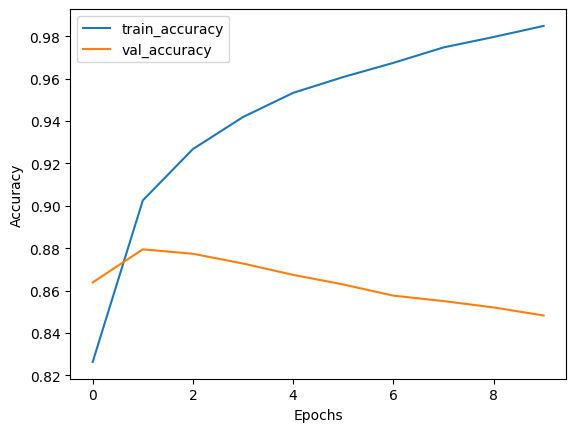

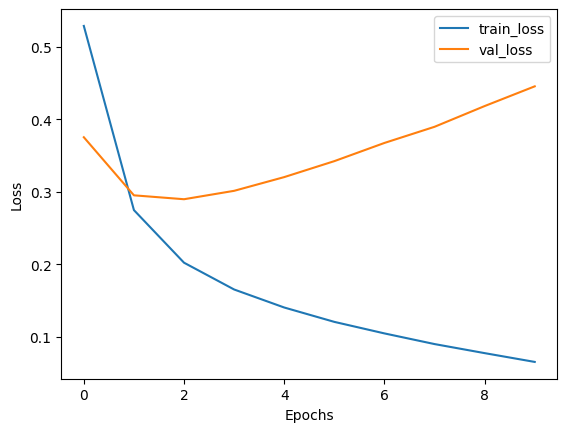

In [ ]:
# Train the model
history = model.fit(X_train_tfidf, y_train, epochs=10, batch_size=512, validation_data=(X_test_tfidf, y_test), verbose=1)

# Plot the training and validation accuracy/loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Model Training** Self-Directed Learning

Ask the following questions to explore and understand the concepts related to training neural networks, interpreting accuracy and loss graphs, and improving model performance.

You may ask the [Sentiment Analysis Tutor GPT](https://chatgpt.com/g/g-xP5xBzqnx-sentiment-analysis-tutor) for information.

1. Understanding the training process
  - What is an epoch, and why do we use multiple epochs during training?
  - What is batch size, and how does it affect the training process?
  - What is the purpose of using validation data during training?
  - How does validation data help in preventing overfitting?

2. Understanding the graphs
  - What does the training accuracy graph tell you about the model's learning process?
  - What does the validation accuracy graph indicate about the model's ability to generalize?
  - How can you interpret the training loss graph?
  - What insights can you gain from the validation loss graph?

3. Interpreting different scenarios
  - If training accuracy is increasing but validation accuracy is not, what might be happening?
  - If both training and validation loss are decreasing and stabilizing, what does this indicate about the model?
  - What does it mean if the training loss decreases to near zero but the validation loss starts to increase?

## Step 4: Evaluating the Model:
  - Evaluate the model on the test set.
  - Generate and analyze the classification report.


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_tfidf, y_test, verbose=0)
print(f'Test accuracy: {accuracy:.4f}')
print(f'Test loss: {loss:.4f}')

# Generate the classification report
from sklearn.metrics import classification_report

# Predict the labels for the test set
y_pred = (model.predict(X_test_tfidf) > 0.5).astype("int32")

# Print the classification report
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


Test accuracy: 0.8483
Test loss: 0.4455
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step
              precision    recall  f1-score   support

    Negative       0.84      0.86      0.85     12500
    Positive       0.86      0.84      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



**Model Evaluation** Self-Directed Learning

After running this code, you should:

- Analyse the test accuracy and loss to understand the model’s performance on unseen data.
- Examine the classification report to get detailed insights into how well the model is classifying positive and negative reviews, focusing on metrics like precision, recall, and F1-score.

These steps will help you evaluate the effectiveness of your neural network for sentiment analysis.

Explore the following questions to deepen your understanding of the concepts. You may ask the [Sentiment Analysis Tutor GPT](https://chatgpt.com/g/g-xP5xBzqnx-sentiment-analysis-tutor) for information.

1. Training Process
  - How do you interpret the training and validation accuracy/loss plots?
  - What does it mean if there is a large gap between training and validation accuracy?

2. Model Performance
  - How do you evaluate the model’s performance on the test set?
  - What metrics are used to assess the performance of a sentiment analysis model?
  - How does the classification report help in understanding model performance?

**Model Performance Analysis** Self-Directed Learning

Ask the following questions to learn more about model performance, and improving model performance.

You may ask the [Sentiment Analysis Tutor GPT](https://chatgpt.com/g/g-xP5xBzqnx-sentiment-analysis-tutor) for information.

1. Overfitting and Underfitting
  - What is overfitting, and how can you identify it from the graphs?
  - What are some strategies to prevent or reduce overfitting?
  - What is underfitting, and how can you identify it from the graphs?
  - What changes can you make to the model to address underfitting?

2. Improving the Model
  - How can increasing the complexity of the model help with underfitting?
  - What is dropout, and how does it help in preventing overfitting?
  - How can you use early stopping to improve the model’s performance?
  - What role does regularization play in improving the model?


## Step 5: Questions and Analysis:
  - Discuss the model’s performance and training process.
  - Suggest improvements and modifications to the network structure.

## Encouraging Critical Thinking: Questions for Your Report##

You are required to answer the following questions in your report. Experiment with the Python codes above to produce evidence and support your answers. Provide detailed explanations and include graphs or metrics where applicable.

You may ask the [Sentiment Analysis Tutor GPT](https://chatgpt.com/g/g-xP5xBzqnx-sentiment-analysis-tutor) for information.

**Analyzing Results**

1. **What might be the reasons for a discrepancy between training and validation accuracy?**
   - **Experiment:** Train the model and observe the accuracy graphs. Identify and explain potential reasons for discrepancies.
   
2. **How can the choice of activation functions impact the model’s performance?**
   - **Experiment:** Change the activation functions (e.g., use `tanh` or `relu` in different layers) and analyze the effects on accuracy and loss.
   - Example:
     ```python
     model = Sequential()
     model.add(Dense(512, input_shape=(input_shape,), activation='tanh'))
     model.add(Dropout(0.5))
     model.add(Dense(1, activation='sigmoid'))
     ```

3. **How does the optimizer affect the training process and the final model performance?**
   - **Experiment:** Use different optimizers (e.g., `adam`, `sgd`, `rmsprop`) and compare the training and validation performance.
   - Example:
     ```python
     model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
     ```

### Experimentation:

1. **How would changing the number of epochs affect the training process?**
   - **Experiment:** Train the model with different numbers of epochs (e.g., 5, 10, 20) and observe the changes in accuracy and loss over time.
   - Example:
     ```python
     history = model.fit(X_train_tfidf, y_train, epochs=20, batch_size=512, validation_data=(X_test_tfidf, y_test), verbose=1)
     ```

2. **What happens if you use a smaller or larger batch size?**
   - **Experiment:** Train the model with different batch sizes (e.g., 64, 128, 512) and compare the training speed and model performance.
   - Example:
     ```python
     history = model.fit(X_train_tfidf, y_train, epochs=10, batch_size=64, validation_data=(X_test_tfidf, y_test), verbose=1)
     ```

3. **How can you experiment with different model architectures to improve performance?**
   - **Experiment:** Modify the model architecture by adding or removing layers, changing the number of neurons, or using different types of layers (e.g., convolutional layers, LSTM layers) and evaluate the impact on performance.
   - Example:
     ```python
     model = Sequential()
     model.add(Dense(512, input_shape=(input_shape,), activation='relu'))
     model.add(Dropout(0.5))
     model.add(Dense(256, activation='relu'))
     model.add(Dropout(0.5))
     model.add(Dense(1, activation='sigmoid'))
     ```

### Conclusion

By answering these questions and providing experimental evidence, you will gain a deeper understanding of the model training process, the importance of various hyperparameters, and techniques to improve model performance. Ensure to include graphs, metrics, and detailed explanations in your report to support your findings.


# Sentiment Analysis with Deep Learning (Graded)


*   Objective: Build a LSTM network for sentiment analysis using deep learning techniques.
*   Activities in this section will be graded.
* Skeleton working Python codes are provided. This assessment encourages you to explore, learn independently, and develop your own insights. Demonstrating your understanding and ability to solve problems will help you achieve good marks.
* Students are welcome to change the code and experiment with ideas. You will not lose marks for trying out ideas, even if they do not yield successful results.

### Step 1: Data Loading and Preprocessing (10 Marks)

In [ ]:
# Load IMDB dataset
imdb = tf.keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Preprocess data with padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 100
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


* Thorough cleaning and preprocessing of data.
* Explain if there is any difference in data preparation between the neural network and deep learning approaches.
* Explain your understanding of this step and the corresponding Python code.

#### **Provide Answers Below:**




### Step 2: Building the LSTM Model (10 Marks)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(tf.keras.layers.Embedding(input_dim=10000, output_dim=128, input_length=max_len))
model.add(tf.keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


* Construction of a well-designed LSTM model.
* Explain the difference in model building between the neural network and deep learning approaches.
* Explain your understanding of this step and the corresponding Python code including your own code.

#### **Provide Answers Below:**

### Step 3: Training the LSTM Model (10 Marks)

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 157ms/step - accuracy: 0.9189 - loss: 0.2186 - val_accuracy: 0.8226 - val_loss: 0.4130
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 53s 168ms/step - accuracy: 0.9346 - loss: 0.1797 - val_accuracy: 0.8224 - val_loss: 0.4599
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 165ms/step - accuracy: 0.9455 - loss: 0.1444 - val_accuracy: 0.8126 - val_loss: 0.4978


* Training with well-chosen parameters, avoiding overfitting or underfitting.
* Explain your understanding of this step and the corresponding Python code including your own code.
* Explain your understanding of the parameters.

#### **Provide Answers Below:**

### Step 4: Evaluating the LSTM Model (10 Marks)

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.8337 - loss: 0.3921
Test accuracy: 0.8354


* Explain your understanding of this step and the corresponding Python code including your own code.
* Explain your understanding different evaluation metrics.
* Interpret the model's performance meaningfully.

#### **Provide Answers Below:**

### Step 5: Model Performance Analysis (20 Marks)

* What is the test accuracy of your LSTM model?
* How does it compare to the neural network in Part 1?
* What changes can you suggest to improve the LSTM model’s performance?
* How did the different architectures impact performance?

#### **Provide Answers Below:**

### Step 6: Experimenting with Different Parameters (20 Marks)

* Try experimenting with different hyperparameters (e.g., increasing epochs or adjusting dropout) and document your findings.
* Discuss the challenges you encountered in improving performance.

#### **Provide Answers Below:**

### Step 7: Finding the Optimised Solution (20 Marks)

* Reflect on the impact of hyperparameters in finding the optimal model configuration. Provide specific examples.
* Were there any limitations in terms of computational power or training time? How did this affect your ability to find the best solution?
* Research and discuss the limitations of traditional Neural Networks versus LSTM for sentiment analysis.
* Why might deep learning models like LSTM perform better on sequential data such as text?
* What research did you find on advanced techniques such as BERT that could further improve model performance?

#### **Provide Answers Below:**


## Acceptable AI Use Level, Reflection and Feedback

Note: Your responses to the following questions are an important part of your learning experience. While these questions are not directly graded, your feedback will provide valuable insights into your actual usage and learning with the Colab notebook and GPT tutor. This information will be considered as part of your overall assessment and can contribute to your final marks. We encourage you to provide detailed and honest feedback to help us improve these tools for future students.

### Acceptable AI Use Level (University Requirement)
- Provide a brief description (approximately 100 words) of how AI was used in the research and drafting process, including specific tools used, and the prompts you have used. Screenshots or downloads from the AI used must be submitted with the assessment, along with at least one draft to show your own work against the AI work.
#### ***Provide Answers Below:***



### General Experience
- How would you rate your overall experience with the Colab notebook and the GPT tutor? Please provide specific examples for each.
#### ***Provide Answers Below:***



### Learning Outcomes
- How confident do you feel about building neural networks and LSTMs after completing the assessment using these tools? What specific skills or knowledge did you gain from each?
#### ***Provide Answers Below:***



### Usability and Accessibility
- How easy was it to navigate and use the Colab notebook and the GPT tutor? Did you encounter any technical issues with either tool?
#### ***Provide Answers Below:***



### Feedback on the GPT Tutor
- How effective was the GPT tutor in answering your questions and helping you understand the assessment tasks?
#### ***Provide Answers Below:***



### Reflection and Suggestions
- What challenges did you face during the practical assessment, and how did you overcome them? Please specify if these challenges were related to the Colab notebook, the GPT tutor, or both.
#### ***Provide Answers Below:***



- Do you have any suggestions for improving the Colab notebook or the GPT tutor?
#### ***Provide Answers Below:***



### Future Use
- Would you recommend these tools to other students? Why or why not? How do you think these tools could be used in other areas of study?
#### ***Provide Answers Below:***


